## Importação de bibliotecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import mlflow

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

## Carga de dados

In [2]:
df = pd.read_excel('./dados/dados.xlsx')
df

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,145,715,1242,1093,758,92,304,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,82,506,2040,2490,827,2506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,96,404,652,644,522,77,254,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,178,393,517,945,584,137,286,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,1089,2821,5110,5422,1073,3261,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213,Vila Sônia,São Paulo,SP,34061,2908,1462,2253,2076,4579,...,1089,2866,2219,2216,1227,306,1098,5285,NaN,NaN
452,355030207,Vila Suzana,São Paulo,SP,35403,4127,1890,2678,2433,5855,...,1522,2458,1186,1166,918,209,3840,7418,NaN,NaN
453,355030162,Vila Terezinha,São Paulo,SP,122359,18304,9304,13258,9965,19248,...,0,1758,4517,9450,11473,3218,7540,1252,NaN,NaN
454,355030157,Vila Zatt,São Paulo,SP,125864,14670,7305,11225,9338,18841,...,872,5093,8063,10012,8082,2856,6853,1936,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        456 non-null    int64  
 1   nome          456 non-null    object 
 2   cidade        456 non-null    object 
 3   estado        456 non-null    object 
 4   população     456 non-null    int64  
 5   popAte9       456 non-null    int64  
 6   popDe10a14    456 non-null    int64  
 7   popDe15a19    456 non-null    int64  
 8   popDe20a24    456 non-null    int64  
 9   popDe25a34    456 non-null    int64  
 10  popDe35a49    456 non-null    int64  
 11  popDe50a59    456 non-null    int64  
 12  popMaisDe60   456 non-null    int64  
 13  domiciliosA1  456 non-null    int64  
 14  domiciliosA2  456 non-null    int64  
 15  domiciliosB1  456 non-null    int64  
 16  domiciliosB2  456 non-null    int64  
 17  domiciliosC1  456 non-null    int64  
 18  domiciliosC2  456 non-null    

### Separação do Rio de Janeiro

In [4]:
df_rj = df.query("cidade == 'Rio de Janeiro'")
df_rj

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,145,715,1242,1093,758,92,304,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,82,506,2040,2490,827,2506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,96,404,652,644,522,77,254,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,178,393,517,945,584,137,286,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,1089,2821,5110,5422,1073,3261,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3304557062,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,...,259,774,1363,1923,1379,190,405,2316,901446.0,Médio
156,3304557093,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,...,219,714,828,1051,1012,116,465,2416,849731.0,Médio
157,3304557091,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,...,906,2866,2241,2982,1200,360,772,3189,1127042.0,Alto
158,3304557065,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,...,87,556,836,940,484,75,214,2418,921875.0,Baixo


In [5]:
df_rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 18  domiciliosC2  160 non-null    

## Tratamento de dados

In [6]:
df_rj.query("rendaMedia.isna()")

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
6,3304557082,Anil,Rio de Janeiro,RJ,24855,2427,1227,1777,1804,3730,...,759,1771,1863,1902,1155,326,424,NaN,1092081.0,Baixo
26,3304557005,Catumbi,Rio de Janeiro,RJ,12910,1773,805,1018,999,1985,...,18,261,640,1281,1140,229,703,NaN,791170.0,Baixo
52,3304557086,Freguesia (Jacarepaguá),Rio de Janeiro,RJ,72501,7991,3709,5257,5159,10923,...,2569,6042,4941,5055,3919,704,1670,NaN,1297388.0,Médio
71,3304557146,Jacaré,Rio de Janeiro,RJ,9538,1326,629,763,712,1547,...,15,161,492,633,792,197,540,NaN,822849.0,Baixo
89,3304557032,Maracanã,Rio de Janeiro,RJ,25969,1696,843,1370,1921,4020,...,1695,3191,1924,1522,877,0,497,NaN,1384873.0,Baixo
122,3304557006,Rio Comprido,Rio de Janeiro,RJ,44998,5332,2397,3448,3757,7160,...,387,2119,2775,3715,3930,617,1681,NaN,789463.0,Baixo


In [7]:
df_rj.query("~rendaMedia.isna()")['rendaMedia'].astype(int).describe()

count      154.000000
mean      3608.071429
std       6091.865305
min        654.000000
25%       1486.000000
50%       1915.500000
75%       2954.500000
max      63887.000000
Name: rendaMedia, dtype: float64

In [8]:
df_rj.fillna(df_rj.rendaMedia.median(), inplace=True)
df_rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 18  domiciliosC2  160 non-null    

/tmp/ipykernel_18811/1201923361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rj.fillna(df_rj.rendaMedia.median(), inplace=True)


In [9]:
df_rj.drop(columns=['codigo', 'nome', 'cidade', 'estado'], inplace=True)

/tmp/ipykernel_18811/2858062325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rj.drop(columns=['codigo', 'nome', 'cidade', 'estado'], inplace=True)


In [10]:
pot_dict = {'Baixo': 0, 'Médio': 1, 'Alto': 2}
df_rj['potencial'] = df_rj['potencial'].apply(lambda x: pot_dict[x])
df_rj

/tmp/ipykernel_18811/3666353166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rj['potencial'] = df_rj['potencial'].apply(lambda x: pot_dict[x])


,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0,1
1,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0,0
2,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0,0
3,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0,1
4,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0,1
156,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0,1
157,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0,2
158,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,921875.0,0


## Visualização

In [11]:
df_rj.describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
count,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.00000,1.600000e+02,160.000000
mean,42654.350000,5329.06250,2484.443750,3272.156250,3349.381250,6584.475000,8826.862500,5332.262500,7475.706250,388.475000,608.268750,1871.562500,2385.075000,3539.850000,3030.806250,568.37500,1821.612500,3544.60000,8.761600e+05,0.912500
std,64262.949072,10816.19977,4948.827166,5752.156303,5601.893201,9049.895783,11536.276416,7986.261929,10258.307743,1403.605232,1535.237669,2973.530791,2779.071565,4324.539462,4003.047836,823.92034,2292.079295,5984.51887,4.382106e+05,0.827115
min,173.000000,33.00000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.00000,2.000000,654.00000,2.465100e+04,0.000000
25%,13362.750000,1512.75000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,0.000000,0.000000,391.500000,716.000000,1088.750000,789.750000,117.75000,431.500000,1498.00000,7.112785e+05,0.000000
50%,26076.000000,3111.50000,1434.000000,2015.000000,2142.500000,4170.500000,5657.000000,3371.500000,4575.500000,0.000000,107.500000,848.000000,1536.000000,2394.500000,1861.500000,327.50000,1042.500000,1915.50000,8.242285e+05,1.000000
75%,46504.500000,5622.25000,2621.500000,3448.750000,3451.750000,7145.250000,9586.750000,6333.250000,9196.000000,1.000000,430.500000,1962.500000,3065.750000,4203.000000,3652.500000,694.00000,2138.250000,2927.50000,9.343208e+05,2.000000
max,667603.000000,122578.00000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.00000,14833.000000,63887.00000,2.915612e+06,2.000000


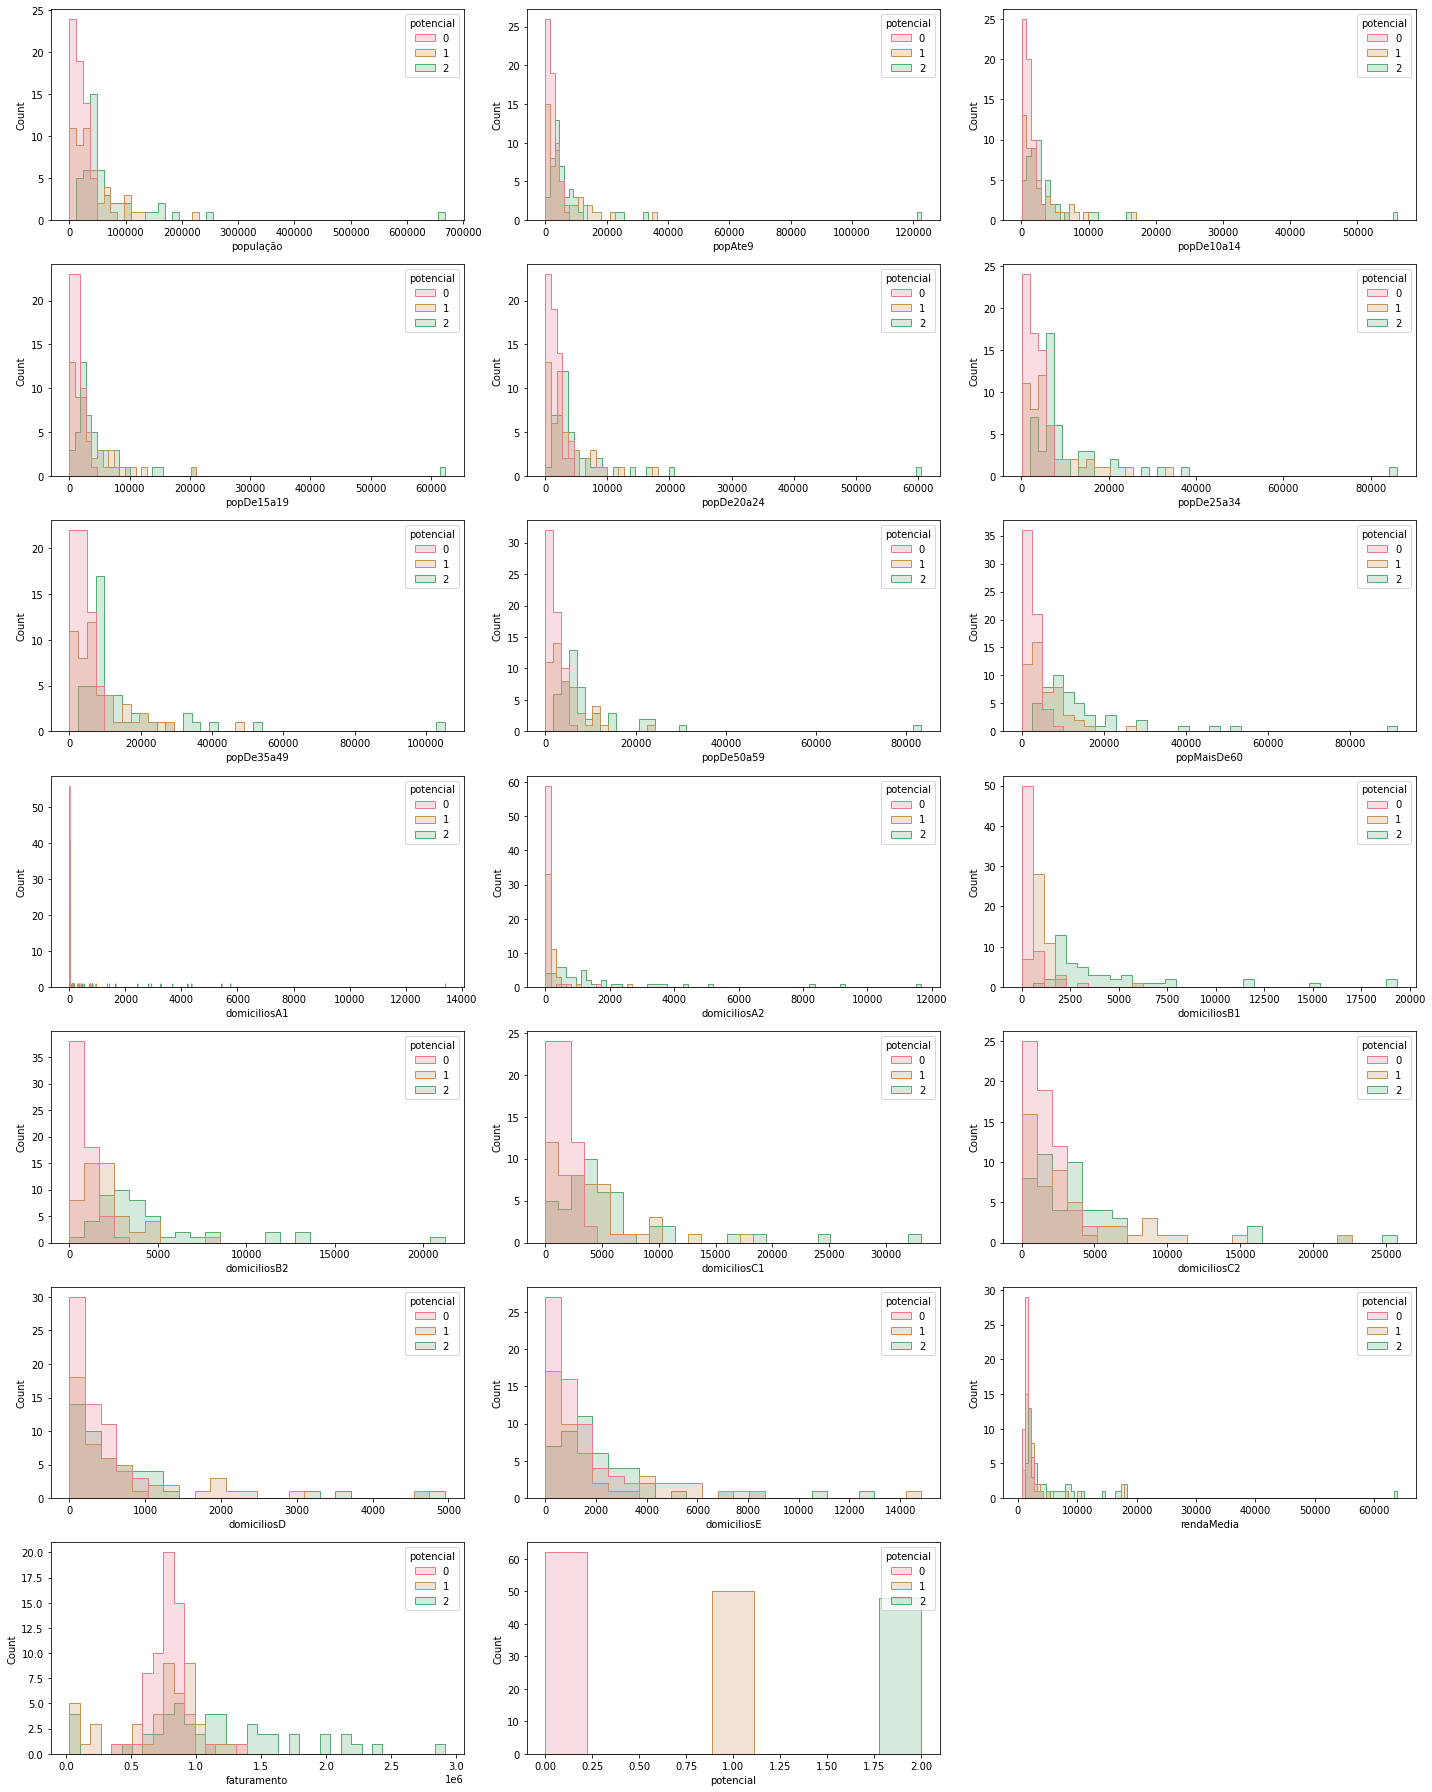

In [12]:
fig, axes = plt.subplots(7, 3, figsize=(20, 25))
axes = axes.ravel()
fig.delaxes(axes[-1])

for i, col in enumerate(df_rj.columns):
    sns.histplot(data=df_rj, x=col, hue='potencial', element="step", palette=['#e77c8d', '#c69255', '#56ad74'], ax=axes[i])
    plt.tight_layout()

<AxesSubplot:>

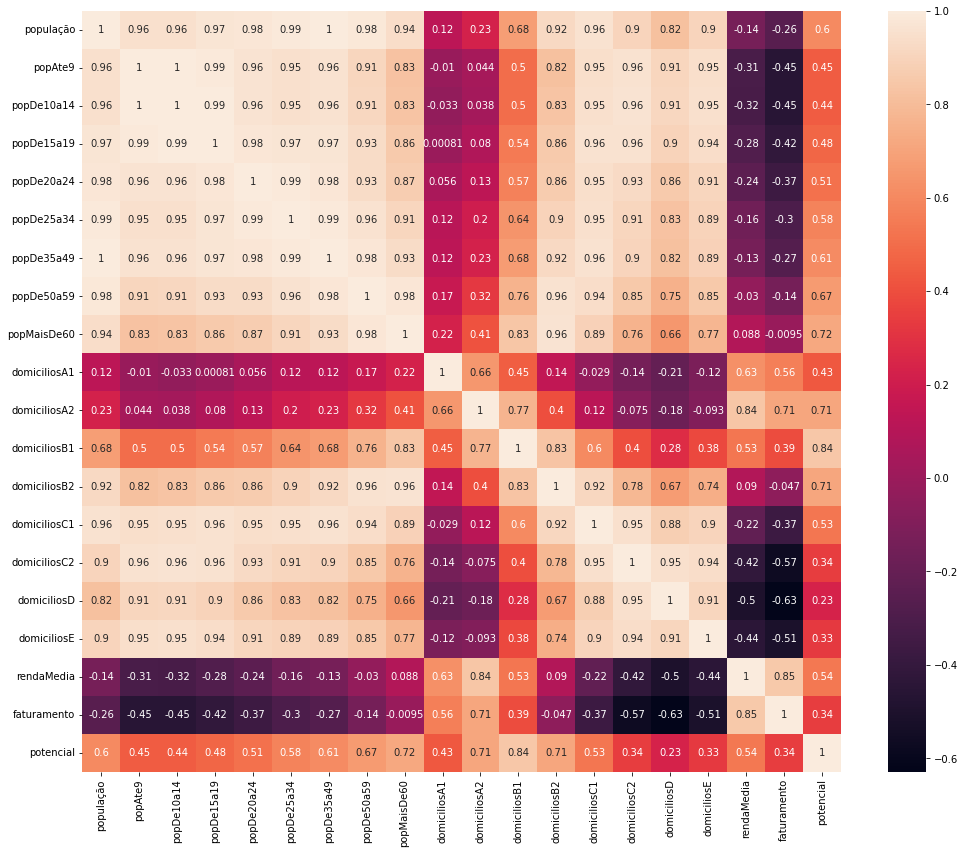

In [13]:
plt.figure(figsize=(17, 14))

sns.heatmap(df_rj.corr(method='spearman'), annot=True)

## Normalização e separação do dado em treino e teste

In [14]:
scaler = MinMaxScaler()
df_rj_norm = pd.DataFrame(scaler.fit_transform(df_rj.drop(columns=['potencial'])), columns=df_rj.drop(columns=['potencial']).columns)

faturamento_scaler = MinMaxScaler()
faturamento_scaler.fit(df_rj.faturamento.values.reshape(-1, 1))

df_rj_norm['potencial'] = df_rj['potencial']

In [15]:
df_rj_norm = df_rj_norm.sample(frac=1)
df_rj_norm.reset_index(drop=True, inplace=True)

## Treinamento e validação

### Faturamento

In [27]:
x = df_rj_norm.drop(columns=['potencial', 'faturamento']) 
y = df_rj_norm[['faturamento']]

#### Grid search

In [28]:
kf = KFold(n_splits=10)

##### LinearRegression

In [ ]:
mlflow.set_experiment("LinearRegression_fat")
r2_list = []
mae_list = []
rmse_list = []
with mlflow.start_run():
    for train_index, test_index in kf.split(x):
        x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model_reg = LinearRegression()
        model_reg.fit(x_train, y_train);
        y_pred = model_reg.predict(x_test)

        y_pred_desnorm = faturamento_scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_desnorm = faturamento_scaler.inverse_transform(y_test.faturamento.values.reshape(-1, 1))
        
        r2_list.append(r2_score(y_test_desnorm, y_pred_desnorm))
        mae_list.append(mean_absolute_error(y_test_desnorm, y_pred_desnorm))
        rmse_list.append(mean_squared_error(y_test_desnorm, y_pred_desnorm)**(1/2))    
        
    metrics = {"R2": np.mean(r2_list), "MAE": np.mean(mae_list), "RMSE": np.mean(rmse_list)}
    print(metrics)
    mlflow.log_metrics(metrics)
mlflow.end_run()

##### RandomForestRegressor

In [ ]:
mlflow.set_experiment("RandomForestRegressor_fat")
r2_list = []
mae_list = []
rmse_list = []

n_estimators_list = [100, 200, 300, 400]
criterion_list = ['squared_error', 'absolute_error']
min_samples_split_list = [2, 4, 6, 8]
max_features_list = ['sqrt', 'log2', None]
bootstrap_list = [True, False]

for n_estimators in n_estimators_list:
        for criterion in criterion_list:
            for min_samples_split in min_samples_split_list:
                for max_features in max_features_list:
                    for bootstrap in bootstrap_list:
                        with mlflow.start_run():
                            for train_index, test_index in kf.split(x):
                                x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
                                model_reg = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, 
                                                                  min_samples_split=min_samples_split, max_features=max_features, 
                                                                  bootstrap=bootstrap, n_jobs=10)
                                
                                params = {'n_estimators': n_estimators, 'criterion': criterion, 'min_samples_split': min_samples_split, 
                                          'max_features': max_features, 'bootstrap': bootstrap}
                                mlflow.log_params(params)
                                
                                model_reg.fit(x_train, y_train.values.ravel())
                                y_pred = model_reg.predict(x_test)

                                y_pred_desnorm = faturamento_scaler.inverse_transform(y_pred.reshape(-1, 1))
                                y_test_desnorm = faturamento_scaler.inverse_transform(y_test.values.reshape(-1, 1))

                                r2_list.append(r2_score(y_test_desnorm, y_pred_desnorm))
                                mae_list.append(mean_absolute_error(y_test_desnorm, y_pred_desnorm))
                                rmse_list.append(mean_squared_error(y_test_desnorm, y_pred_desnorm)**(1/2))        

                            metrics = {"R2": np.mean(r2_list), "MAE": np.mean(mae_list), "RMSE": np.mean(rmse_list)}
                            print(metrics)
                            mlflow.log_metrics(metrics)
                        mlflow.end_run()

##### AdaBoostRegressor

In [ ]:
mlflow.set_experiment("AdaBoostRegressor_fat")
r2_list = []
mae_list = []
rmse_list = []

n_estimators_list = [50, 100, 150, 200, 250]
learning_rate_list = [0.1, 0.25, 0.5, 0.75, 1]
loss_list = ['linear', 'square', 'exponential']

for n_estimators in n_estimators_list:
        for learning_rate in learning_rate_list:
            for loss in loss_list:
                with mlflow.start_run():
                    for train_index, test_index in kf.split(x):
                        x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
                        model_reg = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, loss=loss)
                        
                        params = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'loss': loss}
                        mlflow.log_params(params)
                                
                        model_reg.fit(x_train, y_train.values.ravel());
                        y_pred = model_reg.predict(x_test)

                        y_pred_desnorm = faturamento_scaler.inverse_transform(y_pred.reshape(-1, 1))
                        y_test_desnorm = faturamento_scaler.inverse_transform(y_test.values.reshape(-1, 1))

                        r2_list.append(r2_score(y_test_desnorm, y_pred_desnorm))
                        mae_list.append(mean_absolute_error(y_test_desnorm, y_pred_desnorm))
                        rmse_list.append(mean_squared_error(y_test_desnorm, y_pred_desnorm)**(1/2))        

                    metrics = {"R2": np.mean(r2_list), "MAE": np.mean(mae_list), "RMSE": np.mean(rmse_list)}
                    print(metrics)
                    mlflow.log_metrics(metrics)
                mlflow.end_run()

##### GradientBoostingRegressor

In [ ]:
mlflow.set_experiment("GradientBoostingRegressor_fat")
r2_list = []
mae_list = []
rmse_list = []

n_estimators_list = [100, 200, 300, 400]
criterion_list = ['friedman_mse', 'squared_error']
min_samples_split_list = [2, 4, 6, 8]
max_features_list = ['sqrt', 'log2', 'auto']
loss_list = ['squared_error', 'absolute_error', 'huber', 'quantile']

for n_estimators in n_estimators_list:
    for criterion in criterion_list:
        for min_samples_split in min_samples_split_list:
            for max_features in max_features_list:
                for loss in loss_list:
                    with mlflow.start_run():
                        for train_index, test_index in kf.split(x):
                            x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
                            model_reg = GradientBoostingRegressor(n_estimators=n_estimators, criterion=criterion, loss=loss,
                                                                 min_samples_split=min_samples_split, max_features=max_features)

                            params = {'n_estimators': n_estimators, 'criterion': criterion, 'loss': loss, 'min_samples_split': min_samples_split,
                                     'max_features': max_features}
                            mlflow.log_params(params)

                            model_reg.fit(x_train, y_train.values.ravel());
                            y_pred = model_reg.predict(x_test)

                            y_pred_desnorm = faturamento_scaler.inverse_transform(y_pred.reshape(-1, 1))
                            y_test_desnorm = faturamento_scaler.inverse_transform(y_test.values.reshape(-1, 1))

                            r2_list.append(r2_score(y_test_desnorm, y_pred_desnorm))
                            mae_list.append(mean_absolute_error(y_test_desnorm, y_pred_desnorm))
                            rmse_list.append(mean_squared_error(y_test_desnorm, y_pred_desnorm)**(1/2))        

                        metrics = {"R2": np.mean(r2_list), "MAE": np.mean(mae_list), "RMSE": np.mean(rmse_list)}
                        print(metrics)
                        mlflow.log_metrics(metrics)
                    mlflow.end_run()

#### Uso do melhor modelo
<b>OBS</b>: no mlflow não foi salvo o modelo por conta dos tamanhos dos arquivos. A escolha foi feita considerando o menor MAE

In [16]:
model_reg = GradientBoostingRegressor(loss='squared_error', max_features='sqrt', criterion='friedman_mse', n_estimators=100, min_samples_split=2)

#### Preparando para produção

In [24]:
pipe_faturamento = Pipeline([('scaler', MinMaxScaler()), ('model', model_reg)])
pipe_faturamento.fit(df_rj.drop(columns=['faturamento', 'potencial']), df_rj.faturamento);

### Potencial

In [28]:
x = df_rj_norm.drop(columns=['potencial', 'faturamento']) 
y = df_rj_norm[['potencial']]

#### Grid search

##### RandomForestClassifier

In [ ]:
mlflow.set_experiment("RandomForestClassifier_pot")

f1_list = []
recall_list = []
precision_list = []
acc_list = []

n_estimators_list = [100, 200, 300, 400]
criterion_list = ['gini', 'entropy']
min_samples_split_list = [2, 4, 6, 8]
max_features_list = ['sqrt', 'log2', None]
bootstrap_list = [True, False]

for n_estimators in n_estimators_list:
    for criterion in criterion_list:
        for min_samples_split in min_samples_split_list:
            for max_features in max_features_list:
                for bootstrap in bootstrap_list:
                    with mlflow.start_run():
                        for train_index, test_index in kf.split(x):
                            x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
                            
                            model_clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, 
                                                              min_samples_split=min_samples_split, max_features=max_features, 
                                                              bootstrap=bootstrap, n_jobs=10)

                            params = {'n_estimators': n_estimators, 'criterion': criterion, 'min_samples_split': min_samples_split, 
                                      'max_features': max_features, 'bootstrap': bootstrap}
                            mlflow.log_params(params)
                            
                            model_clf.fit(x_train, y_train.values.ravel())
                            y_pred = model_clf.predict(x_test)

                            f1_list.append(f1_score(y_test, y_pred, average='macro'))
                            recall_list.append(recall_score(y_test, y_pred, average='macro'))
                            precision_list.append(precision_score(y_test, y_pred, average='macro'))
                            acc_list.append(accuracy_score(y_test, y_pred))

                        metrics = {"F1": np.mean(f1_list), "RECALL": np.mean(recall_list), "PRECISION": np.mean(precision_list), "ACC": np.mean(acc_list)}
                        print(metrics)
                        mlflow.log_metrics(metrics)
                    mlflow.end_run()

##### AdaBoostClassifier

In [ ]:
mlflow.set_experiment("AdaBoostClassifier_pot")

f1_list = []
recall_list = []
precision_list = []
acc_list = []

n_estimators_list = [50, 100, 150, 200, 250, 300]
learning_rate_list = [0.1, 0.25, 0.5, 0.75, 1]
base_max_depth_list = [1, 3, 5, 7]
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        for base_max_depth in base_max_depth_list:
            with mlflow.start_run():
                for train_index, test_index in kf.split(x):
                    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
                    
                    model_clf = AdaBoostClassifier(n_estimators=n_estimators, 
                                        learning_rate=learning_rate, 
                                        base_estimator=DecisionTreeClassifier(max_depth=base_max_depth))
                    params = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 
                              'base_estimator': str(DecisionTreeClassifier(max_depth=base_max_depth))}
                    mlflow.log_params(params)

                    model_clf.fit(x_train, y_train.values.ravel())
                    y_pred = model_clf.predict(x_test)

                    f1_list.append(f1_score(y_test, y_pred, average='macro'))
                    recall_list.append(recall_score(y_test, y_pred, average='macro'))
                    precision_list.append(precision_score(y_test, y_pred, average='macro'))
                    acc_list.append(accuracy_score(y_test, y_pred))

                metrics = {"F1": np.mean(f1_list), "RECALL": np.mean(recall_list), "PRECISION": np.mean(precision_list), "ACC": np.mean(acc_list)}
                print(metrics)
                mlflow.log_metrics(metrics)
            mlflow.end_run()

##### GradientBoostingClassifier

In [ ]:
mlflow.set_experiment("GradientBoostingClassifier_pot")

f1_list = []
recall_list = []
precision_list = []
acc_list = []

n_estimators_list = [100, 200, 300, 400]
criterion_list = ['friedman_mse', 'squared_error']
min_samples_split_list = [2, 4, 6, 8]
max_features_list = ['sqrt', 'log2', None]
for n_estimators in n_estimators_list:
    for criterion in criterion_list:
        for min_samples_split in min_samples_split_list:
            for max_features in max_features_list:
                with mlflow.start_run():
                    for train_index, test_index in kf.split(x):
                        x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

                        model_clf = GradientBoostingClassifier(n_estimators=n_estimators, criterion=criterion,
                                                             min_samples_split=min_samples_split, max_features=max_features)

                        params = {'n_estimators': n_estimators, 'criterion': criterion, 'min_samples_split': min_samples_split,
                                 'max_features': max_features}
                        mlflow.log_params(params)

                        model_clf.fit(x_train, y_train.values.ravel());
                        y_pred = model_clf.predict(x_test)

                        f1_list.append(f1_score(y_test, y_pred, average='macro'))
                        recall_list.append(recall_score(y_test, y_pred, average='macro'))
                        precision_list.append(precision_score(y_test, y_pred, average='macro'))
                        acc_list.append(accuracy_score(y_test, y_pred))

                    metrics = {"F1": np.mean(f1_list), "RECALL": np.mean(recall_list), "PRECISION": np.mean(precision_list), "ACC": np.mean(acc_list)}
                    print(metrics)
                    mlflow.log_metrics(metrics)
                mlflow.end_run()

#### Uso do melhor modelo
<b>OBS</b>: no mlflow não foi salvo o modelo por conta dos tamanhos dos arquivos. A escolha foi feita considerando o maior F1<br>

In [29]:
model_clf = GradientBoostingClassifier(max_features='sqrt', criterion='friedman_mse', n_estimators=100, min_samples_split=2)

#### Preparando para produção

In [30]:
pipe_potencial = Pipeline([('scaler', MinMaxScaler()), ('model', model_clf)])
pipe_potencial.fit(df_rj.drop(columns=['faturamento', 'potencial']), df_rj.potencial);

In [32]:
pickle.dump((pipe_faturamento, pipe_potencial), open("./dados/models.pkl", 'wb'))